<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_Prices_FbProphet_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 62 kB 732 kB/s 
     |████████████████████████████████| 6.4 MB 10.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [30]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [31]:
data.tail()

,Adj Close
Date,
2021-12-27,1808.099976
2021-12-28,1810.199951
2021-12-29,1805.099976
2021-12-30,1812.699951
2021-12-31,1827.500000


In [32]:
training_size=data.shape[0]-30
training= data[:training_size]
test=data[training_size:]

In [33]:
m=Prophet()

In [34]:
training.reset_index(inplace=True)

In [35]:
training.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [36]:
training.columns=['ds','y']

In [10]:
training

,ds,y
0,2018-01-02,1313.699951
1,2018-01-03,1316.199951
2,2018-01-04,1319.400024
3,2018-01-05,1320.300049
4,2018-01-08,1318.599976
...,...,...
973,2021-11-12,1867.900024
974,2021-11-15,1866.099976
975,2021-11-16,1853.599976
976,2021-11-17,1869.699951


In [37]:
m.fit(training)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **Model Validation**

In [38]:
future_prices=m.make_future_dataframe(periods=30)

In [39]:
pred=m.predict(future_prices)

In [40]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1003,2021-12-14,1786.187757,1743.796925,1825.352907
1004,2021-12-15,1789.264889,1748.108077,1831.352603
1005,2021-12-16,1792.922033,1750.885074,1833.022200
1006,2021-12-17,1794.908217,1753.527212,1836.121714
1007,2021-12-18,1803.642796,1758.868849,1844.033170


In [41]:
prediction_data=pred[['ds','yhat']]
pred=prediction_data[prediction_data.shape[0]-30:]

In [42]:
pred

,ds,yhat
978,2021-11-19,1782.925858
979,2021-11-20,1786.458713
980,2021-11-21,1784.627778
981,2021-11-22,1778.392908
982,2021-11-23,1776.813501
983,2021-11-24,1774.914470
984,2021-11-25,1773.570717
985,2021-11-26,1770.601335
986,2021-11-27,1774.496265
987,2021-11-28,1773.235149


In [43]:
y_pred=pred['yhat'].values
y_test=test['Adj Close'].values

In [44]:
y_pred

array([1782.92585807, 1786.45871256, 1784.62777825, 1778.39290849,
       1776.81350112, 1774.91446956, 1773.5707166 , 1770.60133547,
       1774.49626545, 1773.23514939, 1767.78165072, 1767.19475436,
       1766.49456283, 1766.54670558, 1765.15658997, 1770.7962219 ,
       1771.42334092, 1767.97612184, 1769.48495825, 1770.938828  ,
       1773.17034448, 1773.950706  , 1781.71725354, 1784.39336277,
       1782.88390277, 1786.18775718, 1789.26488883, 1792.92203323,
       1794.90821696, 1803.64279623])

In [45]:
rmse=np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

In [46]:
print('RMSE of the data is : {}'.format(rmse))

RMSE of the data is : 20.11


### **Forecasting for next 30 days**

In [47]:
import datetime
from datetime import date, timedelta, datetime
from pandas import DataFrame,to_datetime

future = list()
date= datetime.now()
for i in range(0, 30):
  date= date+ timedelta(days=1)
  future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [48]:
forecast = m.predict(future)

In [49]:
forecast[['ds','yhat']]

,ds,yhat
0,2022-01-04 11:56:54.170135,1833.838374
1,2022-01-05 11:56:54.170135,1834.386243
2,2022-01-06 11:56:54.170135,1833.046963
3,2022-01-07 11:56:54.170135,1834.452253
4,2022-01-08 11:56:54.170135,1838.948079
5,2022-01-09 11:56:54.170135,1834.112928
6,2022-01-10 11:56:54.170135,1832.045894
7,2022-01-11 11:56:54.170135,1831.512727
8,2022-01-12 11:56:54.170135,1831.490092
9,2022-01-13 11:56:54.170135,1829.726501


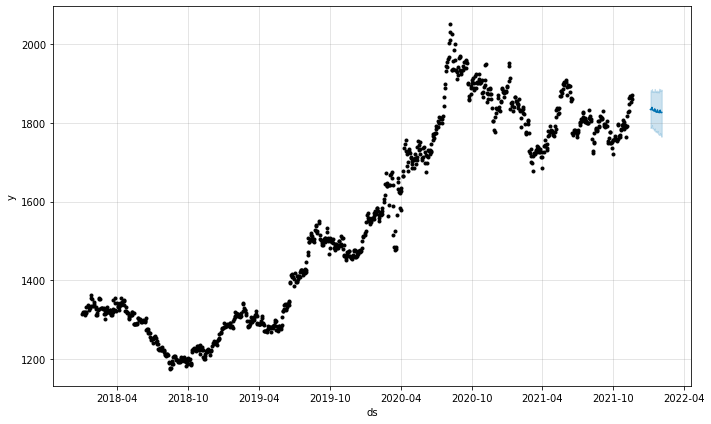

In [50]:
m.plot(forecast)
plt.show()